## Problem K-Kineskih poštara

### Algoritam grube sile

In [1]:
# Funkcija koja pronalazi svaki ciklus u grafu
def find_all_cycles(graph, start, end):
    # Za svaki čvor generiše početni čvor i listu čvorova do kojih se može doći
    paths_from = [(start, [])]
    while paths_from:
        state, path = paths_from.pop()
        if path and state == end:
            yield path
            continue
        for next_state in graph[state]:
            if next_state in path:
                continue
            paths_from.append((next_state, path+[next_state]))

In [2]:
# Susedi svakog čvora u grafu
# Primer 1
nodes = { 
    1: [2, 3, 7], 
    2: [1, 3, 4, 5], 
    3: [1, 2, 4, 5], 
    4: [2, 3, 6, 7, 8], 
    5: [2, 3, 6, 8],
    6: [4, 5, 8],
    7: [1, 4, 8],
    8: [4, 5, 6, 7]
}

# Primer 2
# nodes = { 
#     1: [2, 3, 7], 
#     2: [1, 3, 4, 5], 
#     3: [1, 2, 4, 5], 
#     4: [2, 3, 6, 7, 8], 
#     5: [2, 3, 6, 8],
#     6: [4, 5, 8],
#     7: [1, 4, 8],
#     8: [4, 5, 6, 7]
# }

# Cene iz čvorova ka čvorovima koji su navedeni iznad
# Primer 1
edges = {
    1: [38, 1, 2],
    2: [38, 8, 10, 13],
    3: [1, 8, 26, 2],
    4: [10, 26, 8, 24, 1],
    5: [13, 2, 1, 7],
    6: [8, 1, 7],
    7: [2, 24, 27],
    8: [1, 7, 7, 27]
}

# Primer 2
# edges = {
#     1: [38, 1, 2],
#     2: [38, 8, 10, 13],
#     3: [1, 8, 26, 2],
#     4: [10, 26, 8, 24, 1],
#     5: [13, 2, 1, 7],
#     6: [8, 1, 7],
#     7: [2, 24, 27],
#     8: [1, 7, 7, 27]
# }

cycles = [[node]+path for node in nodes for path in find_all_cycles(nodes, node, node)]

In [3]:
import math

# Funkcija koja vraća samo cikluse koji kreću i završavaju se u čvoru 1
def same_start_end(cycles):
    result_cycles = []
    for i in range(len(cycles)):
        if cycles[i][0] == 1 and cycles[i][-1] == 1:
            result_cycles.append(cycles[i])
    return result_cycles

depot_node_cycles = same_start_end(cycles)

# Funkcija koja vraća sve cikluse, osim onih koji obilaze svaki čvor
def short_cycles(depot_node_cycles):
    result_cycles = []
    
    for cycle in depot_node_cycles:
        if len(cycle) < len(nodes):
            result_cycles.append(cycle)
            
    return result_cycles

short_cycles = short_cycles(depot_node_cycles)

In [4]:
# Funkcija koja računa cenu ture
def calculate_paths(cycles, edges):
    calculated_paths = []
    # Prolazimo kroz sve cikluse koji počinju i završavaju se sa 1
    for i in range(len(cycles)):
        path_cost = 0
        # Prolazimo kroz elemente jednog ciklusa
        for j in range(len(cycles[i])):
            if j != len(cycles[i]) - 1:
                current_node = cycles[i][j] # trenutni čvor
                index_of_cost = nodes[current_node].index(cycles[i][j+1]) # tražimo indeks suseda trenutnog čvora
                cost_to_add   = edges[cycles[i][j]][index_of_cost] # na osnovu indeksa, uzimamo cenu puta do tog suseda
                path_cost += cost_to_add # dodajemo tu cenu na ukupnu cenu ture
        
        calculated_paths.append((cycles[i], path_cost))
    
    
    return calculated_paths

calculated_paths = calculate_paths(short_cycles, edges)

In [10]:
import random

k_postmen = 2

def k_paths(calculated_paths, k_postmen):
    final_paths = []
    cities_visited = []
    total_price = 0
    for i in range(k_postmen):
        
        # Slučajnim izborom biramo jednu od putanja
        random_path_index = random.randrange(0, len(calculated_paths))
        chosen_path = calculated_paths[random_path_index]
        final_paths.append(chosen_path)
        total_price += chosen_path[1]
                        
        # Za svaki čvor proveravamo da li je posećen i ukoliko nije, dodajemo ga u spisak posećenih
        for node in chosen_path[0]:
            if node not in cities_visited:
                cities_visited.append(node)
        
        # Ukoliko do poslednjeg poštara nismo obišli sve čvorove, potrebno je da on obiđe ostatak
        if i == k_postmen-1:
            # Dokle god nismo obišli svaki čvor, tražimo rutu
            while sorted(cities_visited) != sorted(nodes):
                
                # Izbacujemo poslednju rutu
                last_path = final_paths[-1]
                final_paths.remove(last_path)
                
                # Smanjujemo ukupnu cenu
                total_price -= last_path[1]
                
                # Izbacujemo sve čvorove iz te rute
                for node in last_path[0]:
                    route = [j[0] for j in final_paths]
                    if node not in route[0] and node in cities_visited:
                        cities_visited.remove(node)
                
                # Tražimo novu rutu
                random_path_index = random.randrange(0, len(calculated_paths))
                chosen_path = calculated_paths[random_path_index]
                final_paths.append(chosen_path)
                total_price += chosen_path[1]
                
                # Dodajemo čvorove u one koje smo obišli
                for node in chosen_path[0]:
                    if node not in cities_visited:
                        cities_visited.append(node)
            
    return final_paths, cities_visited, total_price

k_paths, cities_visited, total_price = k_paths(calculated_paths, k_postmen)

In [11]:
# Funkcija koja vraća najdužu od k putanja
def longest_path(k_paths):
    path_prices = [j[1] for j in k_paths]
    max_price = max(path_prices)
    min_new_price = max_price
    index_of_highest = path_prices.index(max_price)
    max_path = k_paths[index_of_highest]
        
    return max_path

In [12]:
def kcpp_bf(k_paths):
    # Kopiramo k putanja jer ćemo ih menjati
    new_kpaths = k_paths.copy()
        
    # Uklanjamo putanju sa najvecom cenom iz liste putanja
    max_path = longest_path(new_kpaths)
    new_kpaths.remove(max_path)
    
    routes = [j[0] for j in new_kpaths] 
    
    # Dodajemo sve čvorove koji su posećeni
    cities_visited = []
    for route in routes:
        for node in route:
            if node not in cities_visited:
                cities_visited.append(node)
    
    # Izdvajamo putanje koje su kraće od trenutno najduže i sortiramo ih rastuće
    calculated_paths.sort(key=lambda x: x[1])

    for path in calculated_paths:
        for node in path[0]:
            if node not in cities_visited:
                cities_visited.append(node)
        
        if sorted(cities_visited) == list(nodes):
            new_kpaths.append(path)
            break
            
    total_price_bf = sum([j[1] for j in new_kpaths])
    
    return new_kpaths, sorted(cities_visited), total_price_bf
    
k_paths_bf, cities_visited_bf, total_price_bf = kcpp_bf(k_paths)

In [13]:
print("Paths before optimizing with brute-force algorithm:")
for i in range(len(k_paths)):
    print("\t{}. postman's route: {}".format(i+1, k_paths[i]))

print("\tCities visited: {}".format(sorted(cities_visited)))
print("\tTotal price: {}".format(total_price))


print("\nPaths after optimizing with brute-force algorithm:")
for i in range(len(k_paths_bf)):
    print("\t{}. postman's route: {}".format(i+1, k_paths_bf[i]))
    
print("\tCities visited: {}".format(sorted(cities_visited_bf)))
print("\tTotal price: {}".format(total_price_bf))

Paths before optimizing with brute-force algorithm:
	1. postman's route: ([1, 2, 5, 8, 7, 1], 87)
	2. postman's route: ([1, 3, 5, 6, 4, 7, 1], 38)
	Cities visited: [1, 2, 3, 4, 5, 6, 7, 8]
	Total price: 125

Paths after optimizing with brute-force algorithm:
	1. postman's route: ([1, 3, 5, 6, 4, 7, 1], 38)
	2. postman's route: ([1, 7, 4, 2, 3, 1], 45)
	Cities visited: [1, 2, 3, 4, 5, 6, 7, 8]
	Total price: 83


### Grafički prikaz rezultata

Average price before minimizing: 139.125
Average price after minimizing: 95.75


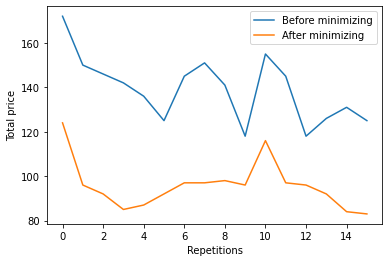

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Primer 1 
# prices = np.array([227, 249, 205, 171, 218, 239, 177, 195, 231, 166, 
#                    220, 166, 231, 251, 226, 177, 196, 200, 191, 157])
# prices_bf = np.array([124, 200, 155, 140, 153, 190, 124, 144, 135, 94, 
#                       120, 123, 128, 148, 177, 128, 135, 150, 143, 124])

prices = np.array([172, 150, 146, 142, 136, 125, 145, 151, 141, 118, 155, 145, 118, 126, 131, 125]) 
prices_bf = np.array([124, 96, 92, 85, 87, 92, 97, 97, 98, 96, 116, 97, 96, 92, 84, 83])


plt.plot(prices)
plt.plot(prices_bf)
plt.xlabel('Repetitions')
plt.ylabel('Total price')

plt.legend(["Before minimizing", "After minimizing"])

average_prices = sum(prices)/len(prices)
average_prices_bf = sum(prices_bf)/len(prices_bf)

print("Average price before minimizing: {}".format(average_prices))
print("Average price after minimizing: {}".format(average_prices_bf))

### Optimizacija simuliranim kaljenjem

In [23]:
# Funkcija koja inicijalizuje početno rešenje uzimanjem k random putanja
def initialize(k_postmen):
    result = []
    initial_visited = []
    for i in range(k_postmen):
        result.append(calculated_paths[random.randrange(0, len(calculated_paths))])
        
    for path in result:
        for node in path[0]:
            if node not in initial_visited:
                initial_visited.append(node)
    return result, initial_visited

# Funkcija koja proverava da li je novoizabrana putanja odgovarajuća
def isFeasible(path, visited):
    added = []
    feasible_visited = visited.copy()
    
    for node in path[0]:
        if node not in visited:
            added.append(node)
            feasible_visited.append(node)
    
    if sorted(feasible_visited) == sorted(to_visit):
        return True
    else:
        for node in path[0]:
            if node in added:
                feasible_visited.remove(node)
        return False

# Funkcija koja vraća izmene učinjene u change funkciji
def restore(j, result, old_result):        
    result[j] = old_result
        
# Funkcija koja bira putanju drugačiju od trenutne
def change(result, final_visited):
    j = random.randrange(0, len(result))
    old_result = result[j]
    result[j] = calculated_paths[random.randrange(0, len(calculated_paths))]
    if isFeasible(result[j], final_visited):
        return j, old_result
    result[j] = old_result
    return -1, old_result
    

def simulated_annealing(result, max_iters):
    current_max_path = longest_path(result)
    best_max_path = current_max_path
    final_kpaths  = []
    final_visited = []
    
    # Formiramo finalne putanje, bez maksimalne, jer nju menjamo
    for path in result:
        if path != current_max_path:
            final_kpaths.append(path)
    
    # Formiramo listu čvorova koje smo obišli u finalnim putanjama
    for path in final_kpaths:
        for node in path[0]:
            if node not in final_visited:
                final_visited.append(node)
    
    i = 1
    while i < max_iters:
        j, old_result = change(result, final_visited)
        if j < 0:
            continue
        new_max_path = longest_path(result)
        
        if isFeasible(new_max_path, final_visited) and new_max_path[1] < current_max_path[1]:
            current_max_path = new_max_path
        else:
            p = 1.0 / i**0.5
            q = random.uniform(0, 1)
            if p > q:
                current_max_path = new_max_path
            else:
                restore(j, result, old_result)
        if new_max_path[1] < best_max_path[1]:
            best_max_path = new_max_path
        
        i+=1
    
    final_kpaths.append(best_max_path)
        
    return final_kpaths, best_max_path

#### Testiranje rada algoritma

In [41]:
MAX_ITERS = 10000
to_visit = list(nodes)
solution, visited = initialize(k_postmen)

total_price = 0
for path in solution:
    total_price += path[1]

print("Paths before optimizing using simulated annealing: ")
for i in range(len(solution)):
    print("\t{}. postman's route: {}".format(i+1, solution[i]))

print("\tCities visited: {}".format(sorted(visited)))
print("\tTotal price: {}".format(total_price))

solution_sa, optimized_max_path = simulated_annealing(solution, MAX_ITERS)

total_price_sa = 0
visited_sa = []
for path in solution_sa:
    total_price_sa += path[1]
    for node in path[0]:
        if node not in visited_sa:
            visited_sa.append(node)


print("Paths after optimizing using simulated annealing: ")
for i in range(len(solution_sa)):
    print("\t{}. postman's route: {}".format(i+1, solution_sa[i]))

print("\tCities visited: {}".format(sorted(visited_sa)))
print("\tTotal price: {}".format(total_price_sa))

Paths before optimizing using simulated annealing: 
	1. postman's route: ([1, 7, 8, 6, 4, 2, 1], 92)
	2. postman's route: ([1, 7, 4, 2, 1], 74)
	Cities visited: [1, 2, 4, 6, 7, 8]
	Total price: 166
Paths after optimizing using simulated annealing: 
	1. postman's route: ([1, 7, 4, 2, 1], 74)
	2. postman's route: ([1, 3, 5, 6, 8, 7, 1], 40)
	Cities visited: [1, 2, 3, 4, 5, 6, 7, 8]
	Total price: 114


Average price before minimizing: 155.4375
Average price after minimizing: 109.1875


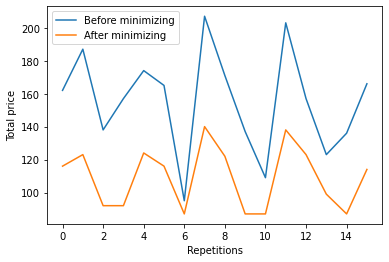

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Primer 1
# prices = np.array([198, 250, 209, 211, 252, 192, 138, 141, 214, 205, 
#                    220, 155, 267, 179, 244, 230, 217, 278, 134, 172])
# prices_sa = np.array([157, 201, 126, 125, 198, 119, 122, 126, 111, 157, 
#                       170, 98, 117, 97, 159, 127, 169, 175, 98, 89])

prices = np.array([162, 187, 138, 157, 174, 165, 95, 207, 171, 137, 109, 203, 157, 123, 136, 166])
prices_sa = np.array([116, 123, 92, 92, 124, 116, 87, 140, 122, 87, 87, 138, 123, 99, 87, 114])

plt.plot(prices)
plt.plot(prices_sa)
plt.xlabel('Repetitions')
plt.ylabel('Total price')

plt.legend(["Before minimizing", "After minimizing"])

average_prices = sum(prices)/len(prices)
average_prices_sa = sum(prices_sa)/len(prices_sa)

print("Average price before minimizing: {}".format(average_prices))
print("Average price after minimizing: {}".format(average_prices_sa))